<a href="https://colab.research.google.com/github/sjsneha/ADG-Quiz-Website/blob/main/churn_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Churn Prediction**
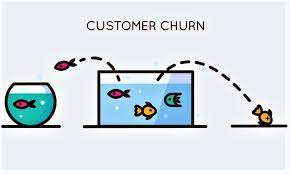


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Importing the dataset



In [ ]:
#importing the dataset
import pandas as pd
df=pd.read_csv(r"/content/drive/MyDrive/churn/Churn_small.csv")

In [ ]:
df.shape

(100854, 22)

In [ ]:
df.head()

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,2.213021e+11,5.213008e+11,1078.922643,2996.0,2014-09-19,30,1993-04-19,32.691960,-97.006550,Grand Prairie,...,87500.0,1.0,5.0,Single,75000 - 99999,0.0,0.0,1.0,NaN,0
1,2.213030e+11,5.213012e+11,700.258858,1404.0,2019-01-28,56,1966-07-27,32.707286,-96.983400,Grand Prairie,...,62500.0,0.0,15.0,Married,75000 - 99999,1.0,1.0,1.0,NaN,0
2,2.213004e+11,5.213001e+11,1156.169879,1676.0,2018-05-01,33,1989-09-20,32.770303,-96.860059,Dallas,...,17500.0,1.0,5.0,Single,25000 - 49999,0.0,0.0,1.0,NaN,0
3,2.213033e+11,5.213015e+11,1285.679389,6291.0,2005-09-11,72,1950-12-31,32.905698,-97.440779,Fort Worth,...,125000.0,0.0,5.0,Married,500000 - 749999,1.0,0.0,1.0,NaN,0
4,2.213031e+11,5.213013e+11,1427.843028,3478.0,2013-05-25,45,1977-10-23,32.736812,-97.373928,Fort Worth,...,42500.0,1.0,11.0,Married,25000 - 49999,1.0,1.0,1.0,NaN,0


## 2. Preprocessing

In [ ]:
df.columns

Index(['individual_id', 'address_id', 'curr_ann_amt', 'days_tenure',
       'cust_orig_date', 'age_in_years', 'date_of_birth', 'latitude',
       'longitude', 'city', 'state', 'county', 'income', 'has_children',
       'length_of_residence', 'marital_status', 'home_market_value',
       'home_owner', 'college_degree', 'good_credit', 'acct_suspd_date',
       'Churn'],
      dtype='object')

<Axes: >

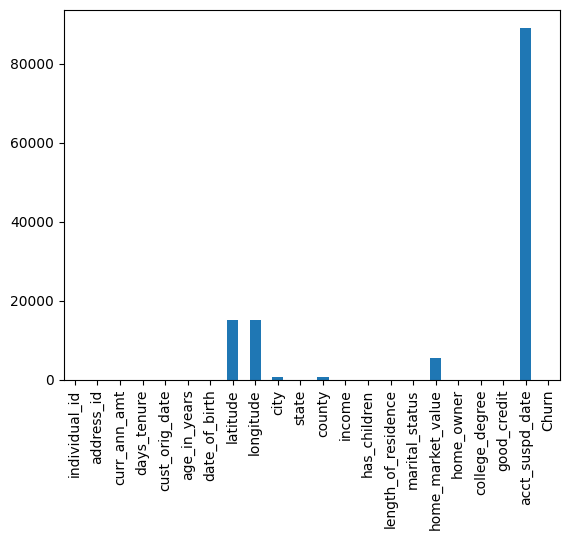

In [ ]:
df.isnull().sum().plot(kind='bar')

### 2.1. Using Pandas profiler

In [ ]:
!pip install ydata_profiling
import ydata_profiling as pp
profile = pp.ProfileReport(df)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=eece206b0e2f400e4cde5352418b9d9bc4b3c0062f1b9eae83a58caa66981f5d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

ImportError: ignored

In [ ]:
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 2.2. Filling missing values using fill forward/backward

In [ ]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [ ]:
df['latitude']=df['latitude'].ffill(axis=0)

In [ ]:
df['longitude']=df['longitude'].bfill(axis=0)

In [ ]:
df.columns[df.isnull().any()]

Index([], dtype='object')

### 2.3. Filling missing value using mode()

<Axes: >

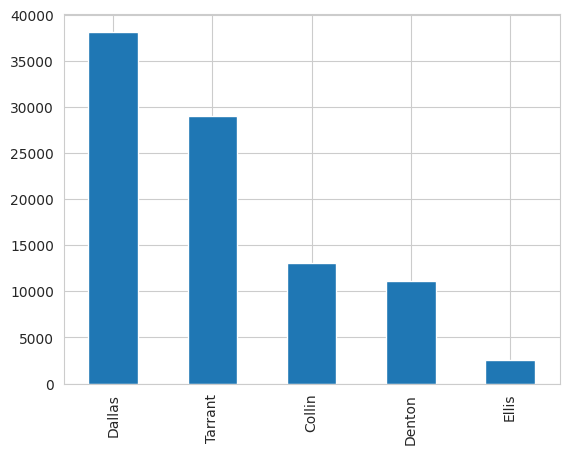

In [ ]:
df.county.value_counts().head().plot(kind='bar')

In [ ]:
df["county"].fillna(df['county'].mode()[0], inplace = True)

<Axes: >

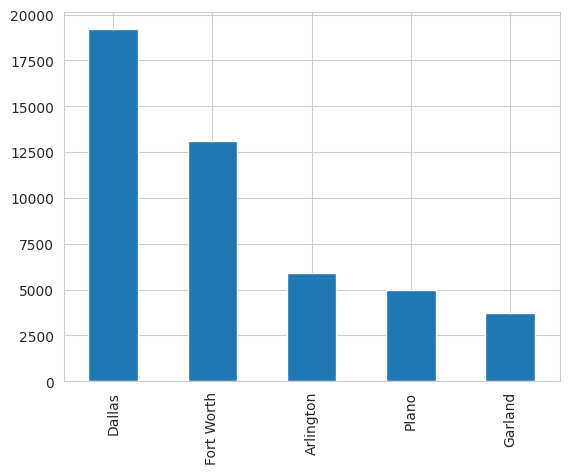

In [ ]:
df['city'].value_counts().head().plot(kind='bar')

In [ ]:
df["city"].fillna(df['city'].mode()[0], inplace = True)

### 2.4. Filling missing values using knn imputer

In [ ]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=5)

In [ ]:
df['home_market_value'].value_counts()

75000 - 99999      19359
100000 - 124999    18112
125000 - 149999    13777
50000 - 74999      13447
150000 - 174999     9722
175000 - 199999     6142
25000 - 49999       5328
200000 - 224999     4247
225000 - 249999     2795
250000 - 274999     1815
1000 - 24999        1468
275000 - 299999     1114
300000 - 349999     1109
350000 - 399999      638
500000 - 749999      564
400000 - 449999      354
450000 - 499999      269
750000 - 999999      189
1000000 Plus         120
Name: home_market_value, dtype: int64

In [ ]:
home_value_map={'1000 - 24999':1,
               '25000 - 49999':2,
                '50000 - 74999':3,
                '75000 - 99999':4,
                '100000 - 124999':5,
                '125000 - 149999':6,
                '150000 - 174999':7,
                '175000 - 199999':8,
                '200000 - 224999':9,
                '225000 - 249999':10,
                '250000 - 274999':11,
                '275000 - 299999':12,
                '300000 - 349999':13,
                '350000 - 399999':14,
                 '400000 - 449999':15,
                '450000 - 499999':16,
                '500000 - 749999': 17,
                 '750000 - 999999':18,
                 '1000000 Plus': 19,
               }

In [ ]:
df['home_market_value_ordinal']=df.home_market_value.map(home_value_map)

In [ ]:
num=[col for col in df.columns if df[col].dtypes!='O']
df[num].isna().sum()

curr_ann_amt                 0
days_tenure                  0
age_in_years                 0
latitude                     0
longitude                    0
income                       0
has_children                 0
length_of_residence          0
marital_status               0
home_owner                   0
college_degree               0
good_credit                  0
Churn                        0
home_market_value_ordinal    0
dtype: int64

In [ ]:
knn.fit(df[num])

KNNImputer()

In [ ]:
df[num]=knn.transform(df[num])

In [ ]:
df['home_market_value_ordinal']=df['home_market_value_ordinal'].round(0)

<Axes: >

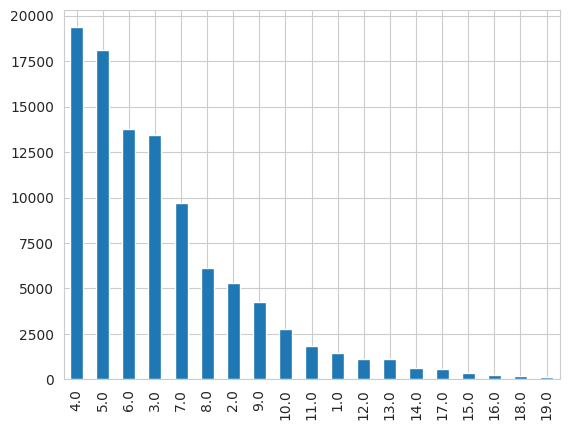

In [ ]:
df.home_market_value_ordinal.value_counts().plot(kind='bar')

### 2.5.dropping the column

In [ ]:
df=df.drop(['acct_suspd_date'], axis=1)


KeyError: ignored

In [ ]:
df.columns

Index(['curr_ann_amt', 'days_tenure', 'cust_orig_date', 'age_in_years',
       'date_of_birth', 'latitude', 'longitude', 'city', 'state', 'county',
       'income', 'has_children', 'length_of_residence', 'marital_status',
       'home_market_value', 'home_owner', 'college_degree', 'good_credit',
       'Churn', 'home_market_value_ordinal'],
      dtype='object')

In [ ]:
df.size

2011380

In [ ]:
df['home_market_value']=df.home_market_value_ordinal.map({v: k for k, v in home_value_map.items()})

In [ ]:
df.to_csv("churn_preprocessed.csv",index=False)
df.isna().sum().sum()

0

## 3.Visualisation

### 3.1.EDA

<ipython-input-3-eff30d9ec5fc>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

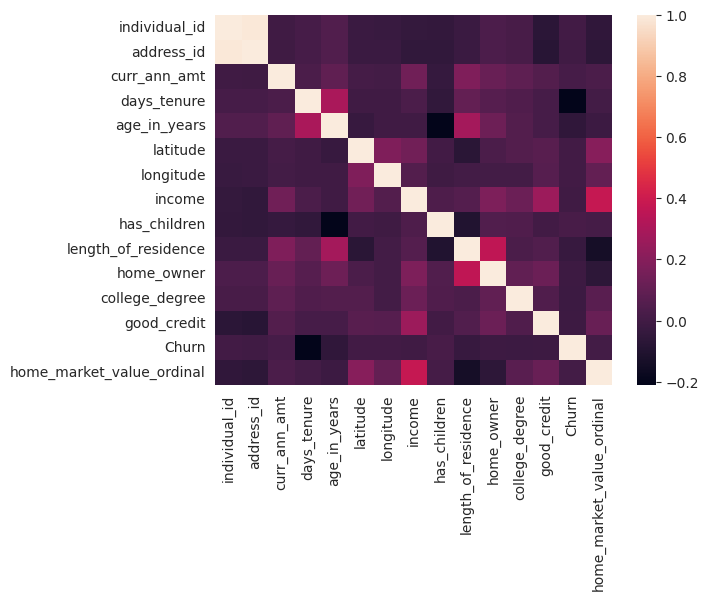

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/churn/churn_preprocessed.csv")
#corelation plot
import seaborn as sns
sns.set_style('whitegrid')
sns.heatmap(df.corr())

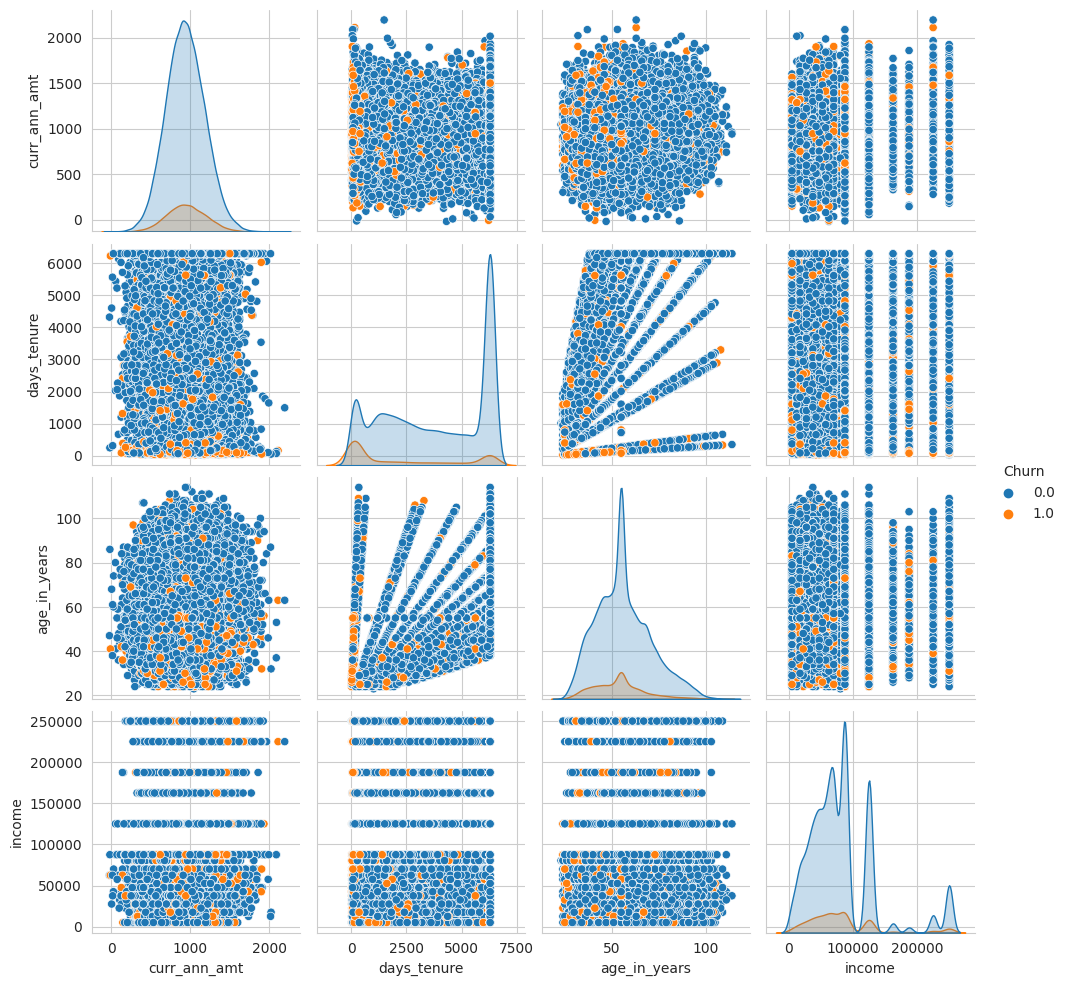

In [ ]:
sns.pairplot(df[['curr_ann_amt', 'days_tenure','age_in_years', 'income','Churn']],hue='Churn')

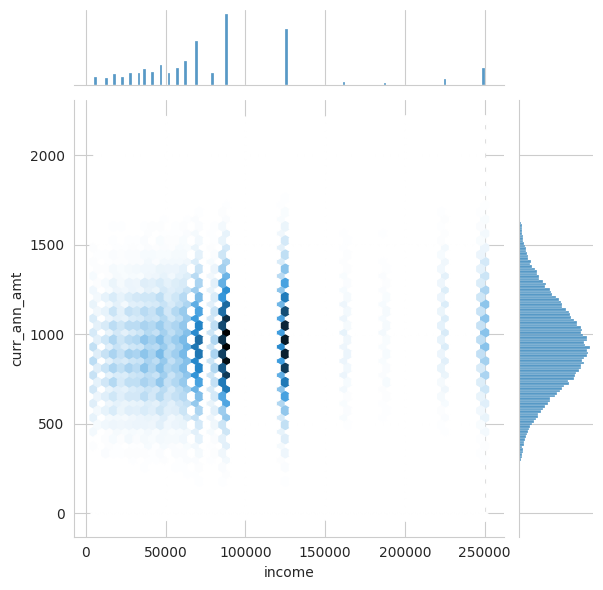

In [ ]:
sns.jointplot(x="income",y='curr_ann_amt',data=df,kind='hex')

<ipython-input-7-b52d4c14a83d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age_in_years'])


<Axes: xlabel='age_in_years', ylabel='Density'>

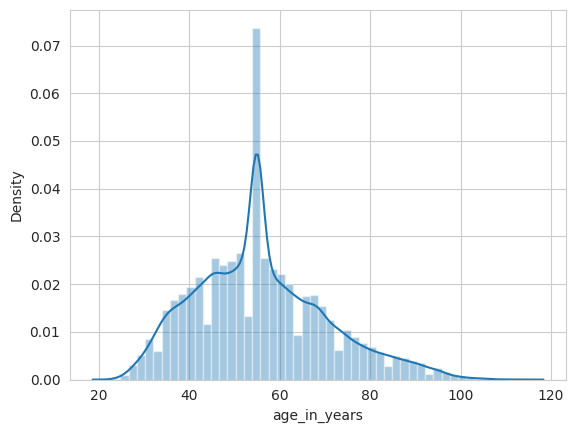

In [ ]:
sns.distplot(df['age_in_years'])

<Axes: >

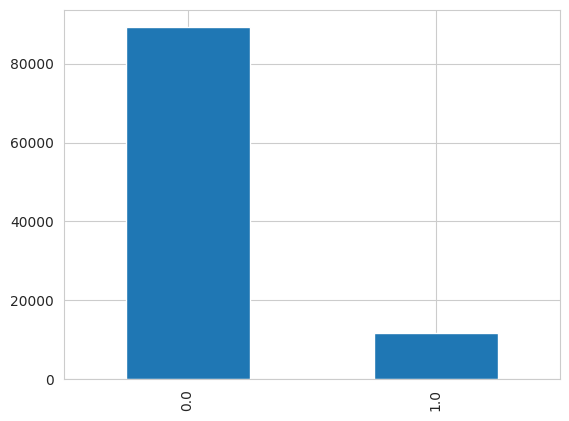

In [ ]:
df['Churn'].value_counts().plot(kind='bar')

<Axes: xlabel='count', ylabel='marital_status'>

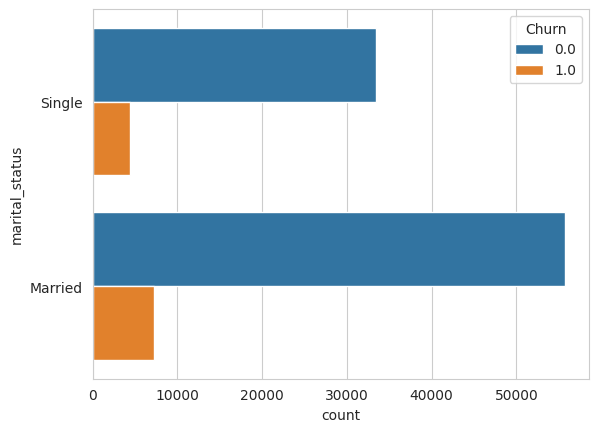

In [ ]:
sns.countplot(y="marital_status",hue='Churn',data=df)

<Axes: xlabel='count', ylabel='good_credit'>

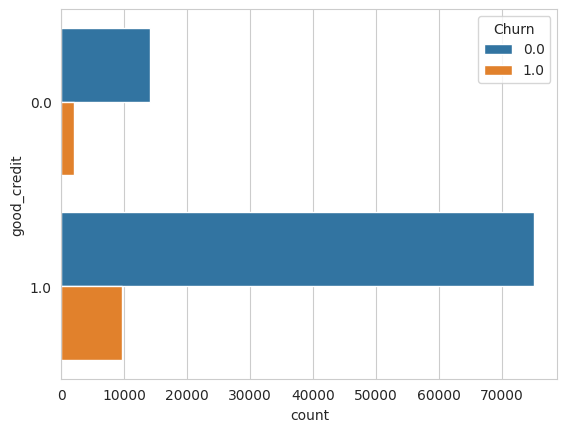

In [ ]:
sns.countplot(y="good_credit",hue='Churn',data=df)

In [ ]:
df['good_credit']=df['good_credit'].map({1:'Yes',0:'No'})

<Axes: xlabel='count', ylabel='home_owner'>

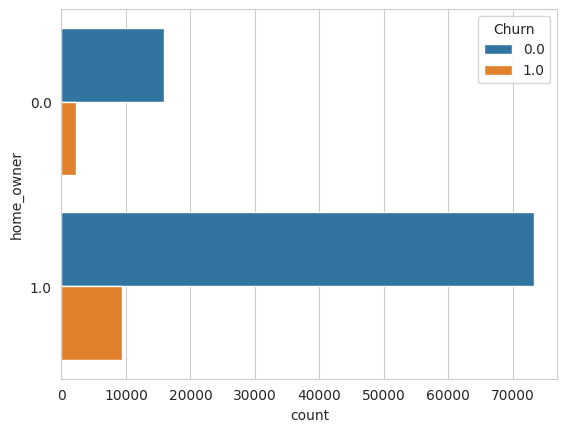

In [ ]:
sns.countplot(y="home_owner",hue='Churn',data=df)

In [ ]:
df.columns

Index(['individual_id', 'address_id', 'curr_ann_amt', 'days_tenure',
       'cust_orig_date', 'age_in_years', 'date_of_birth', 'latitude',
       'longitude', 'city', 'state', 'county', 'income', 'has_children',
       'length_of_residence', 'marital_status', 'home_market_value',
       'home_owner', 'college_degree', 'good_credit', 'Churn',
       'home_market_value_ordinal'],
      dtype='object')

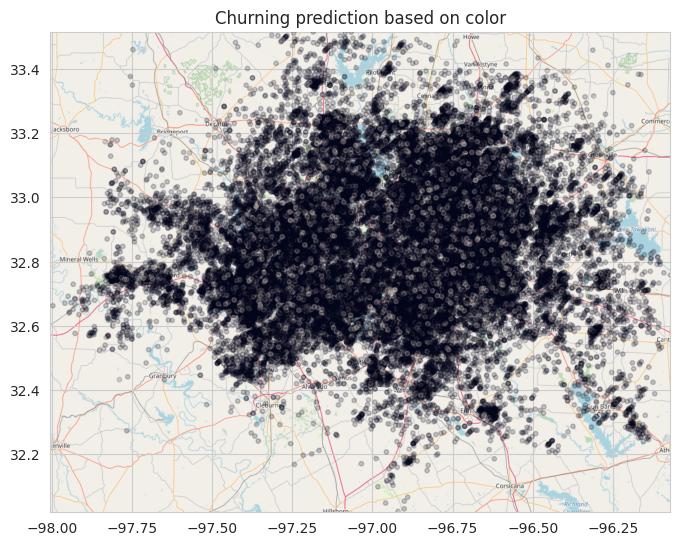

In [ ]:
#plotting the data on map
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/drive/MyDrive/churn/churn_preprocessed.csv")
BBox = (df.longitude.min(),df.longitude.max(),df.latitude.min(), df.latitude.max())
ruh_m = plt.imread('/content/drive/MyDrive/churn/map.png')
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.longitude, df.latitude, zorder=3, alpha= 0.2, c=df['Churn'], s=10)
ax.set_title('Churning prediction based on color')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

### 3.2. Outlier detection and treatment using capping and trimming

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df.columns

Index(['individual_id', 'address_id', 'curr_ann_amt', 'days_tenure',
       'cust_orig_date', 'age_in_years', 'date_of_birth', 'latitude',
       'longitude', 'city', 'state', 'county', 'income', 'has_children',
       'length_of_residence', 'marital_status', 'home_market_value',
       'home_owner', 'college_degree', 'good_credit', 'Churn',
       'home_market_value_ordinal'],
      dtype='object')

<Axes: xlabel='curr_ann_amt', ylabel='Density'>

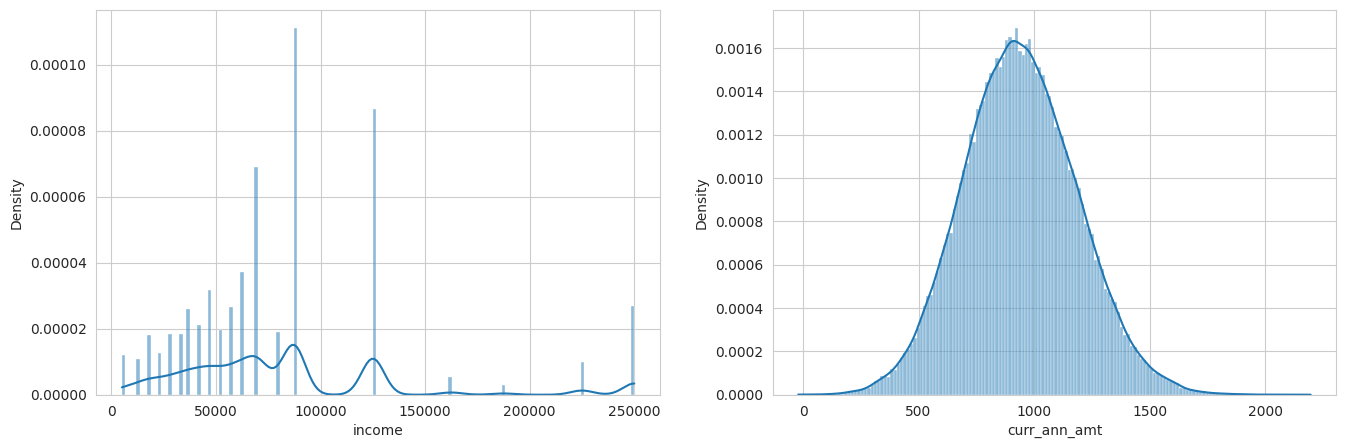

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df.income,kde=True,stat="density")
plt.subplot(1,2,2)
sns.histplot(df.curr_ann_amt,kde=True,stat="density")

<Axes: >

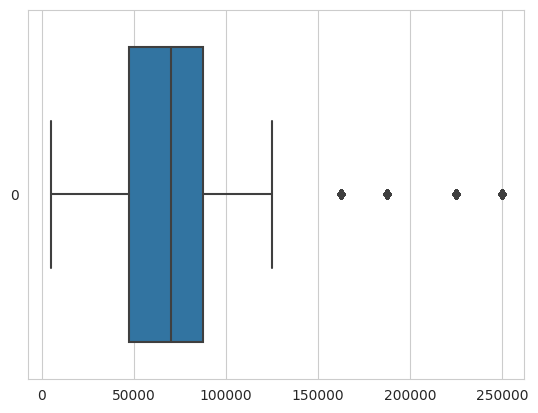

In [ ]:
sns.boxplot(df.income,orient='h')

In [ ]:
#IQR outlier detetction
print(df.income.describe())
quan25=df.income.quantile(.25)
quan75=df.income.quantile(.75)
iqr=quan75-quan25
up_lm=quan75+1.5*iqr
lo_lm=quan75-1.5*iqr
print("No of Outliers "+str(df[df["income"]>up_lm].count()[0]+df[df["income"]<lo_lm].count()[0]))

count    100854.000000
mean      81358.800547
std       54270.001332
min        5000.000000
25%       47500.000000
50%       70000.000000
75%       87500.000000
max      250000.000000
Name: income, dtype: float64
No of Outliers 17104


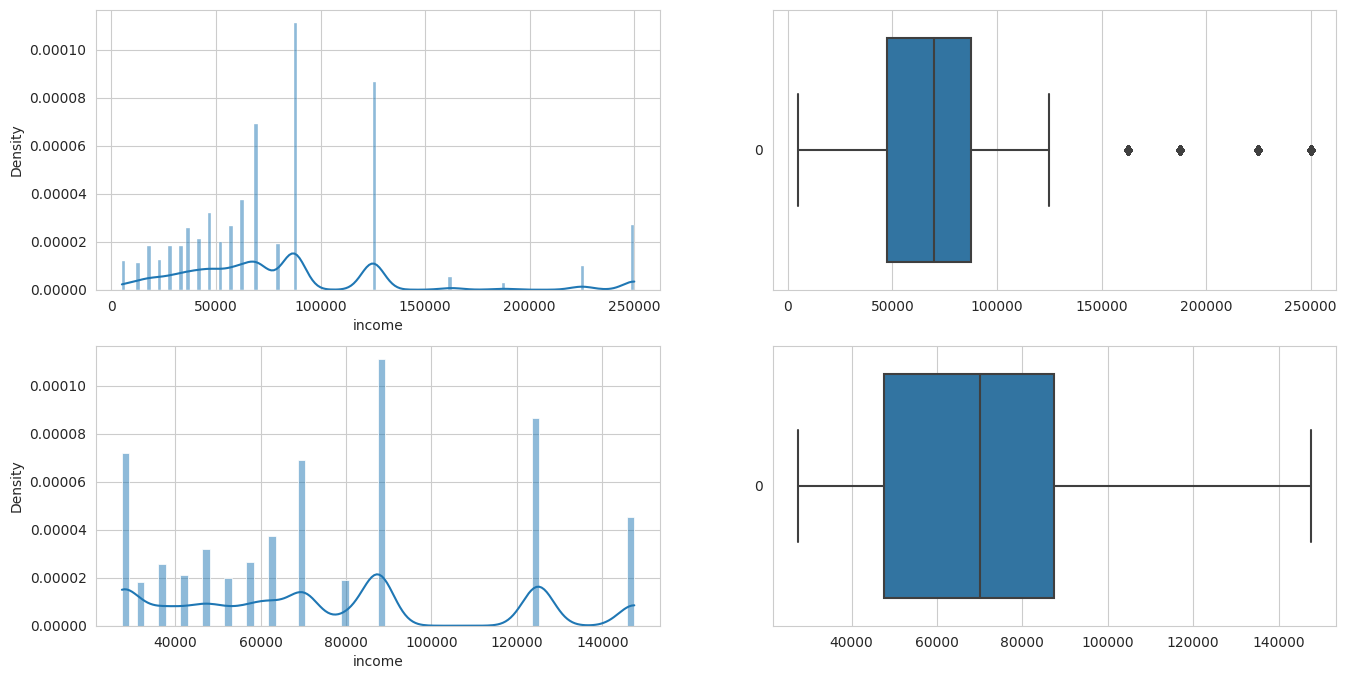

In [ ]:
#Capping
new_df_cap = df.copy()

new_df_cap['income'] = np.where(
    new_df_cap['income'] > up_lm,
    up_lm,
    np.where(
        new_df_cap['income'] < lo_lm,
        lo_lm,
        new_df_cap['income']
    )
)
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['income'],kde=True,stat="density")

plt.subplot(2,2,2)
sns.boxplot(df['income'],orient='h')

plt.subplot(2,2,3)
sns.histplot(new_df_cap['income'],kde=True,stat="density")

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['income'],orient='h')

plt.show()

<Axes: >

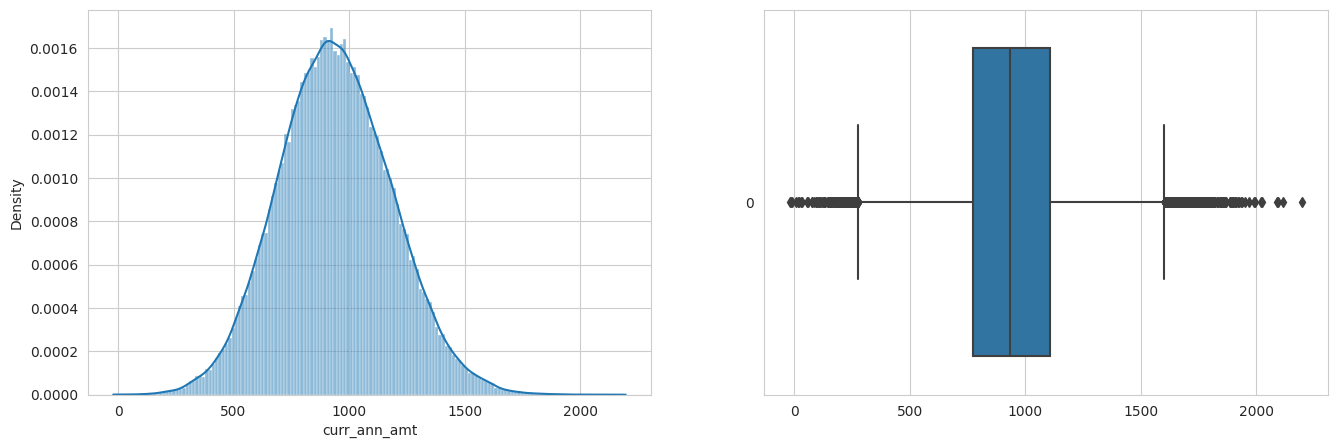

In [ ]:
#z-score outlier detection
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(new_df_cap.curr_ann_amt,kde=True,stat='density')
plt.subplot(1,2,2)
sns.boxplot(new_df_cap.curr_ann_amt,orient='h')

no. of outliers 285


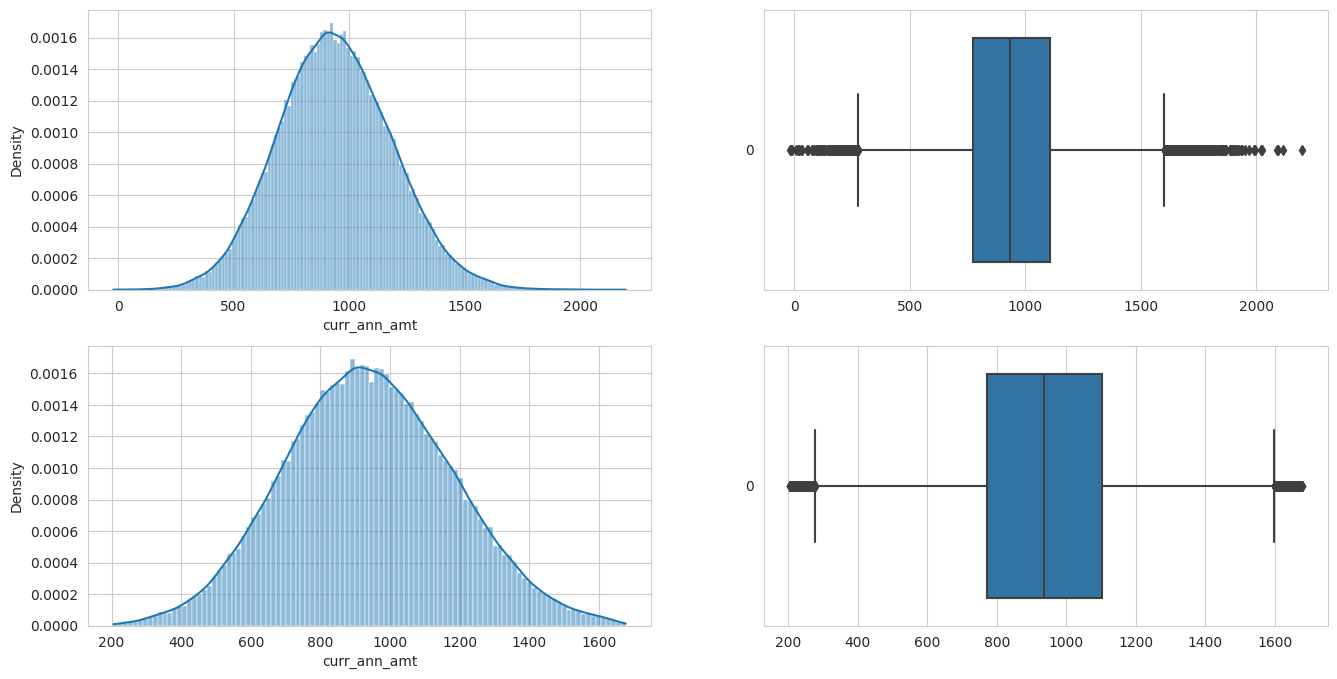

In [ ]:
mx_lm=df.curr_ann_amt.mean()+3*df.curr_ann_amt.std()
min_lm=df.curr_ann_amt.mean()-3*df.curr_ann_amt.std()
print("no. of outliers "+str(df[(df['curr_ann_amt']>mx_lm) | (df['curr_ann_amt']<min_lm)].count()[0]))
new_df=new_df_cap[(df['curr_ann_amt']<mx_lm) & (df['curr_ann_amt']>min_lm)]
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(new_df_cap['curr_ann_amt'],kde=True,stat="density")

plt.subplot(2,2,2)
sns.boxplot(new_df_cap['curr_ann_amt'],orient='h')

plt.subplot(2,2,3)
sns.histplot(new_df['curr_ann_amt'],kde=True,stat="density")

plt.subplot(2,2,4)
sns.boxplot(new_df['curr_ann_amt'],orient='h')

plt.show()
new_df.to_csv("churn_outlier_removed.csv",index=False)

## 4.PCA

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("/content/drive/MyDrive/churn/churn_outlier_removed.csv")
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num=[col for col in df.columns if df[col].dtypes!='O']
new_df=df[num].copy()
new_df.columns
new_df=new_df.drop('Churn',axis="columns")
scaler.fit(new_df)
scaled_data=scaler.transform(new_df)

In [ ]:
pd.DataFrame(scaled_data).head()
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
pd.DataFrame(x_pca)

,0,1,2,3,4,5,6,7,8,9
0,0.167940,1.918155,0.702658,-0.825247,0.401855,-0.841774,0.234505,0.901727,1.577863,-0.323396
1,1.936017,-0.779668,-0.298074,-0.752547,-0.361503,-0.291733,0.095616,-2.276199,-0.177066,0.593422
2,-1.512586,2.768218,-0.894695,-0.690439,-0.627618,-0.169564,0.767733,0.571546,1.841642,-0.991309
3,1.284988,-2.461772,2.503232,1.486690,2.210696,-2.095251,0.518421,1.818707,-1.193561,0.453482
4,2.157695,-0.683888,-0.416785,-2.455745,0.849605,0.461931,1.249174,0.170660,0.934921,-1.357522
...,...,...,...,...,...,...,...,...,...,...
100564,0.496749,-0.635573,0.135490,-0.296544,-0.302970,0.633200,-0.243916,1.674156,-0.155196,-2.370783
100565,-0.343050,-1.648759,-0.499412,-0.759394,0.579642,-0.469845,-0.757094,1.539109,0.552832,0.573995
100566,-1.967005,0.553910,0.249753,-1.289508,-0.076811,1.241952,0.100822,-0.676587,1.425337,0.254909
100567,-2.179935,-1.870105,0.174770,-0.276081,1.869640,0.761982,-0.601694,-0.024323,-0.654858,0.096137


In [ ]:
#Eigan Vector
print("Eigan Vector: ")
pca.explained_variance_

Eigan Vector: 


array([2.06864634, 1.84100483, 1.65324937, 1.20808641, 1.04672143,
       0.99884668, 0.9689618 , 0.86789987, 0.83371041, 0.77285824])

In [ ]:
print("Data Loss: "+str(round(100- pca.explained_variance_ratio_.sum()*100,0))+"%")

Data Loss: 12.0%


## 5. Model comparison

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/churn/churn_outlier_removed.csv")
#Removing irrelevant columns
df=df.drop(['individual_id','address_id'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['marital_status'] = le.fit_transform(df['marital_status'])
feat_cols = ['curr_ann_amt', 'days_tenure', 'age_in_years', 'income', 'has_children',
       'length_of_residence', 'marital_status', 'home_owner', 'college_degree', 'good_credit']
X = df[feat_cols]
y = df['Churn']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#logistic regression
from sklearn.linear_model import LogisticRegression
print("Logistic Regression:")
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     29371
         1.0       0.00      0.00      0.00      3817

    accuracy                           0.88     33188
   macro avg       0.44      0.50      0.47     33188
weighted avg       0.78      0.88      0.83     33188



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
  # space['C'] = loguniform(1e-5, 100)
  # define search
search = RandomizedSearchCV(model, space, n_iter=12, scoring='accuracy', n_jobs=10, cv=cv, random_state=1)
  # execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='none' 

Best Score: 0.8844574370796091
Best Hyperparameters: {'solver': 'newton-cg', 'penalty': 'none'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [ ]:
#Decision tree Classifier
print("Decision tree classifier:")
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
from sklearn import tree
# tree.plot_tree(model)



Decision tree classifier:
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89     29371
         1.0       0.23      0.26      0.24      3817

    accuracy                           0.81     33188
   macro avg       0.57      0.57      0.57     33188
weighted avg       0.82      0.81      0.82     33188



In [ ]:
#Random Forest
print("Random Forest:")
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

Random Forest:
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94     29371
         1.0       0.51      0.20      0.29      3817

    accuracy                           0.89     33188
   macro avg       0.70      0.59      0.61     33188
weighted avg       0.86      0.89      0.86     33188



In [ ]:
#Oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

#logistic regression
print("Logistic Regression:")
model = LogisticRegression()
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#Decision tree Classifier
print("Decision tree classifier:")
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.93      0.61      0.74     29371
         1.0       0.18      0.64      0.28      3817

    accuracy                           0.62     33188
   macro avg       0.55      0.63      0.51     33188
weighted avg       0.84      0.62      0.69     33188

Decision tree classifier:
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89     29371
         1.0       0.24      0.28      0.26      3817

    accuracy                           0.81     33188
   macro avg       0.57      0.58      0.57     33188
weighted avg       0.83      0.81      0.82     33188

